In [261]:
import sys
sys.path.append("../")
import library
import math
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

# Question 1

![Question1](./assignment1_assets/Q1.png) 

### We are given $e^{-x} = x$, considering g(x) = e^{-x} and g(x) = x

In [5]:
def g(x):
    return math.exp(-1*x)

In [75]:
def fixed_point_single_variable(g, guess, eps = 1e-4):
    """
    Function to find root using fixed point method for equation of a single variable

    args:
    g: The function g(x), such that g(x) = x
    guess: The guess values to start working with
    eps: The minimum error before the roots are returned
    """
    
    del_ = 1e5
    while(del_ > eps):
        guess_new = g(guess)
        del_ = abs(guess - guess_new)
        guess = guess_new
    return guess

In [79]:
root = fixed_point_single_variable(g = g,
                                   guess = 5,
                                   eps= 1e-4 )
print(f"The root found from the fixed point method is {root}")

The root found from the fixed point method is 0.567119358625214


# Question 2

![Question2](./assignment1_assets/Q2.png) 

### Changing the limits first to make the computation easier,
$$
\int_0^1 \sqrt{1+x^4}\,dx = \frac{1}{2}*\int_{-1}^1 \sqrt{1+x^4}\,dx
$$

In [81]:
def func(x):
    return math.sqrt(1+x**4)

In [97]:
#Since the question asks us to calculate the solution accurate upto 6 places in decimal
#and given that the error varies inversely to the 4th power of N, we choose N to be 50 to get
#sufficient precision

intergral_soln_simpson = 0.5*library.integrate(func = func, N = 50, a=-1, b=1, mode = "simpson")
print(f"The solution for the Integral is {intergral_soln_simpson}")

The solution for the Integral is 1.089429413109075


### Solving with Gaussian Quardrature

In [302]:

No_of_points = 50
nodes, weights = np.polynomial.legendre.leggauss(No_of_points)
a = -1
b = 1
# transform the nodes and weights to the interval [a, b]
x_mapped = 0.5 * (b - a) * nodes + 0.5 * (b + a)

#Calculate the integral
integral_approx = 0.5*(0.5*(b - a) * np.sum(weights * (1+x_mapped**4)**0.5))
print(f"Solution for the Integral {integral_approx}")

Solution for the Integral 1.0894294132248237


# Question 3

![Question3](./assignment1_assets/Q3.png) 

In [112]:
def runge_kutta(dydx,init_value, range_, h=0.01):
    """
    runge_kutta: Function to calculate the solution of a ODE by using the Runge Kutta method
    args:
    init_value: The starting values or x0, y0
    range_: The tuple corresponding to (x0,xn)
    h: The step size for each iteration
    """
    x = []
    y = []

    k1 = []
    k2 = []
    k3 = []
    k4 = []

    x.append(init_value[0])
    y.append(init_value[1])
    
    no_steps = int((range_[1]-range_[0])/h)
    
    for i in range(no_steps):
        k1.append(h*dydx(y[i],x[i]))

        k2.append(h* dydx((y[i]+k1[i]/2),(x[i] + h/2)) )

        k3.append(h* dydx((y[i]+k2[i]/2),(x[i] + h/2)) )
        
        k4.append(h* dydx((y[i]+k3[i]),(x[i] + h)))
        
        x.append(x[i]+h)
        y.append((y[i]+(k1[i]+ 2*k2[i] + 2*k3[i] + k4[i])/6))
                
    return x,y

In [113]:
def dydx(y,x):
    return (5*(x**2) - y)/(math.exp(x+y))

#### Taking the range of x from 0 to 1 for this study

In [131]:
interval_size = [0.50,0.20,0.05,0.01]
X = []
Y = []
print("Interval size|\t\t\ty(0)|\t\t\ty(1)|")
for h_ in interval_size:
    x,y = runge_kutta(dydx=dydx,
                      init_value=(0,1),
                      range_=(0,1),
                      h = h_
                     )
    print(f"\t{h_}|\t\t\t{y[0]}|\t{y[-1]}|")
    X.append(x)
    Y.append(y)

Interval size|			y(0)|			y(1)|
	0.5|			1|	1.071926337431937|
	0.2|			1|	1.0715857107318785|
	0.05|			1|	1.0715779650370647|
	0.01|			1|	1.071577937341309|


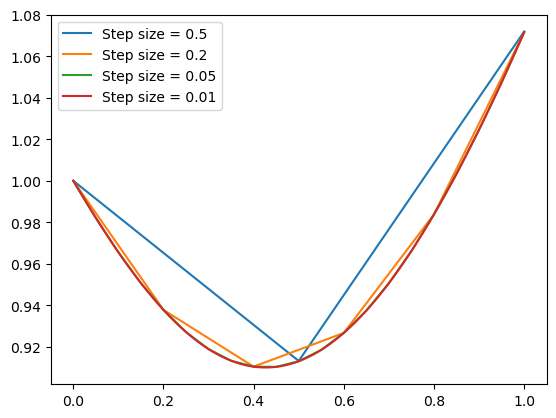

In [136]:
#Plotting the results for better clarity
plt.plot(X[0],Y[0], label = f"Step size = {interval_size[0]}")
plt.plot(X[1],Y[1], label = f"Step size = {interval_size[1]}")
plt.plot(X[2],Y[2], label = f"Step size = {interval_size[2]}")
plt.plot(X[3],Y[3], label = f"Step size = {interval_size[3]}")
plt.legend()
plt.show()

#### Taking the range of x from 0 to 10 as another example

In [139]:
interval_size = [0.50,0.20,0.05,0.01]
X = []
Y = []
print("Interval size|\t\t\ty(0)|\t\t\ty(10)|")
for h_ in interval_size:
    x,y = runge_kutta(dydx=dydx,
                      init_value=(0,1),
                      range_=(0,10),
                      h = h_
                     )
    print(f"\t{h_}|\t\t\t{y[0]}|\t{y[-1]}|")
    X.append(x)
    Y.append(y)

Interval size|			y(0)|			y(10)|
	0.5|			1|	2.44455734472942|
	0.2|			1|	2.4444543366426372|
	0.05|			1|	2.4444520517429957|
	0.01|			1|	2.4444520437002137|


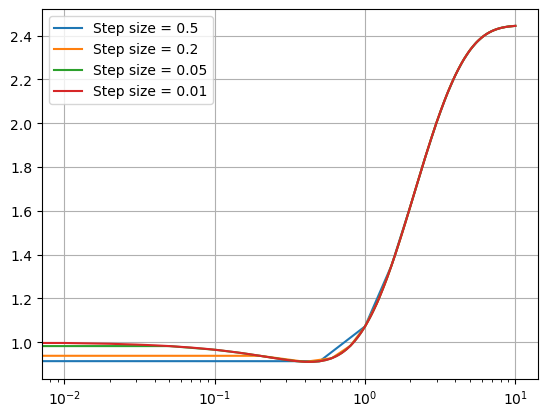

In [143]:
#Plotting the results for better clarity
plt.plot(X[0],Y[0], label = f"Step size = {interval_size[0]}")
plt.plot(X[1],Y[1], label = f"Step size = {interval_size[1]}")
plt.plot(X[2],Y[2], label = f"Step size = {interval_size[2]}")
plt.plot(X[3],Y[3], label = f"Step size = {interval_size[3]}")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()


# Question 4

![Question4](./assignment1_assets/Q4.png) 

# Considering the heat equation to be
$$
u_t = z*u_{xx}
$$
The update equation is as follows
$V_j$ = $(2*I*z + \alpha*B)^{-1}$$(2*I*z -\alpha*B)$

In [237]:
import numpy as np # Using numpy for inversion and Tridiagonal matrix
from scipy.sparse import diags
import pandas as pd
z = 4
x_discreetisation = 1
t_discreetisation = 2
x_range = (0,8)
t_range = (0,50)
X = np.arange(x_range[0],x_range[-1],x_discreetisation)[:,None]
V_0 = 4*X - (X**2)/2
n = V_0.shape[0]
B = diags([-1*np.ones(n-1),2*np.ones(n),-1*np.ones(n-1)],[-1,0,1]).toarray()
alpha = t_discreetisation/(x_discreetisation)**2

In [238]:
V = []
V.append(V_0)
for t in range(int((t_range[1]-t_range[0])/t_discreetisation)-1):
    V.append(np.matmul(np.matmul(np.linalg.inv(2*z*np.eye(n) + alpha*B),(2*z*np.eye(n) - alpha*B)),V[t]))

In [239]:
V_grid = np.concatenate(V,axis = -1)

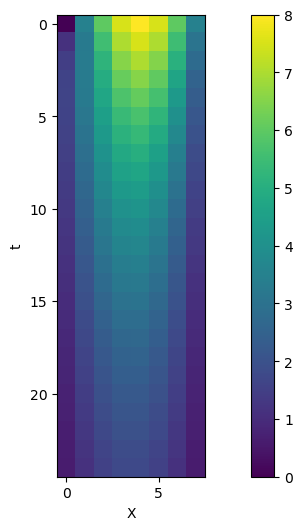

In [250]:
plt.figure(figsize=(12,6))
plt.imshow(V_grid.T)
plt.xlabel("X")
plt.ylabel("t")
plt.colorbar()

In [246]:
# Time is along the rows the X is along the columns
pd.DataFrame(V_grid.T)

,0,1,2,3,4,5,6,7
0,0.000000,3.500000,6.000000,7.500000,8.000000,7.500000,6.000000,3.500000
1,1.129943,3.279656,5.547994,7.008307,7.501846,7.002768,5.514760,3.085793
2,1.476664,3.320444,5.208751,6.548109,7.013454,6.517846,5.071483,2.792972
3,1.597858,3.313374,4.956084,6.137076,6.547948,6.057747,4.677903,2.555888
4,1.627626,3.256668,4.731692,5.770866,6.115321,5.630341,4.325382,2.352510
5,1.613143,3.166936,4.515818,5.437057,5.717777,5.237759,4.007390,2.172965
6,1.575013,3.056857,4.303296,5.127292,5.352745,4.878806,3.719405,2.012121
7,1.523630,2.934899,4.093742,4.836814,5.016516,4.550695,3.457893,1.866923
8,1.464808,2.806686,3.888137,4.562940,4.705614,4.250204,3.219811,1.735258
9,1.402051,2.676005,3.687662,4.304068,4.417112,3.974235,3.002464,1.615465


In [247]:
alpha

2.0

In [248]:
# Native Python Matrix inversion is used. The value of alpha is 2.0 it is not much important
# in this case given the stability of CN.

# Question 5

![Question5](./assignment1_assets/Q5.png) 

In [284]:
u = np.zeros((6,6)) # Initializing the Matrix 6X6
x = np.linspace(0, 2, 6) # X axis
y = np.linspace(0, 1, 6) # Y axis
iterations = 10000
#Applying the bounday conditions
u[:, 0] = x
u[:, -1] = x*np.e
u[0, :] = 0
u[-1, :] = 2*np.exp(y)

dy = 0.1
dx = 0.1

In [285]:
f = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        f[i, j] = x[i] * np.exp(y[j])

# Jacobi iterative method
for _ in tqdm(range(iterations)):
    for i in range(1, 6 - 1):
        for j in range(1, 6 - 1):
            u[i, j] = ((dy**2 * (u[i+1, j] + u[i-1, j]) + dx**2 * (u[i, j+1] + u[i, j-1]) - dx**2 * dy**2 * f[i, j]) / (2 * (dx**2 + dy**2)))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [286]:
pd.DataFrame(u)

,0,1,2,3,4,5
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.4,0.513566,0.636359,0.772252,0.922886,1.087313
2,0.8,1.022792,1.265584,1.537050,1.840883,2.174625
3,1.2,1.521789,1.878071,2.284059,2.746775,3.261938
4,1.6,2.000951,2.458752,2.996205,3.626926,4.349251
5,2.0,2.442806,2.983649,3.644238,4.451082,5.436564


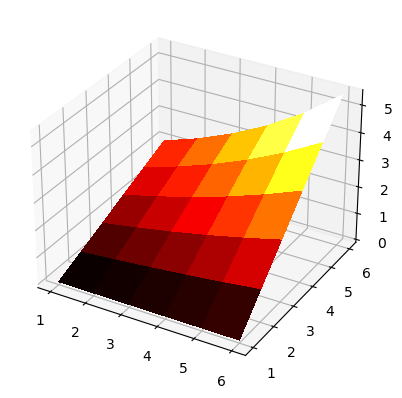

In [287]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(1,7)
Y = np.arange(1,7)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)